In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import nxviz as nv
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from gmaps import Geocoding
api = Geocoding()

In [3]:
ngdata = pd.read_csv("/Users/bendenisshaffer/Box Sync/UM Fall 2017/SI 608/Project/Data/clean_gas_trade.csv")
cfdata = pd.read_csv("/Users/bendenisshaffer/Box Sync/UM Fall 2017/SI 608/Project/Data/clean_coffee_trade.csv")
ssdata = pd.read_csv("/Users/bendenisshaffer/Box Sync/UM Fall 2017/SI 608/Project/Data/clean_sugar_trade.csv")

In [4]:
ngdata = ngdata.drop(ngdata.columns[0],1)
cfdata = cfdata.drop(cfdata.columns[0],1)
ssdata = ssdata.drop(ssdata.columns[0],1)

In [5]:
ngdata = ngdata.groupby(["Year","Reporter","Partner"])[["Trade_Value__US__","Netweight__kg_"]].sum()
ngdata.columns = ["Trade_Value_USD","Netweight_KG"]
ngdata["Commodity"] = "Natural Gas"

ngdata05 = ngdata.loc[2005]
ngdata05["Year"] = 2005
ngdata05 = ngdata05.reset_index()
ngdata05 = ngdata05.assign(terms = ngdata05.Trade_Value_USD / ngdata05.Netweight_KG)

ngdata10 = ngdata.loc[2010]
ngdata10["Year"] = 2010
ngdata10 = ngdata10.reset_index()
ngdata10 = ngdata10.assign(terms = ngdata10.Trade_Value_USD / ngdata10.Netweight_KG)

ngdata15 = ngdata.loc[2015]
ngdata15["Year"] = 2015
ngdata15 = ngdata15.reset_index()
ngdata15 = ngdata15.assign(terms = ngdata15.Trade_Value_USD / ngdata15.Netweight_KG)

gasG05 = nx.from_pandas_dataframe(ngdata05, source = 'Reporter', target = 'Partner', 
                                  edge_attr = True, create_using = nx.DiGraph())
gasG10 = nx.from_pandas_dataframe(ngdata10, source = 'Reporter', target = 'Partner', 
                                  edge_attr = True, create_using = nx.DiGraph())
gasG15 = nx.from_pandas_dataframe(ngdata15, source = 'Reporter', target = 'Partner', 
                                  edge_attr = True, create_using = nx.DiGraph())

In [6]:
cfdata = cfdata.groupby(["Year","Reporter","Partner"])[["Trade_Value__US__","Netweight__kg_"]].sum()
cfdata.columns = ["Trade_Value_USD","Netweight_KG"]
cfdata["Commodity"] = "Raw Coffee"

cfdata05 = cfdata.loc[2005]
cfdata05["Year"] = 2005
cfdata05 = cfdata05.reset_index()
cfdata05 = cfdata05.assign(terms = cfdata05.Trade_Value_USD / cfdata05.Netweight_KG)

cfdata10 = cfdata.loc[2010]
cfdata10["Year"] = 2010
cfdata10 = cfdata10.reset_index()
cfdata10 = cfdata10.assign(terms = cfdata10.Trade_Value_USD / cfdata10.Netweight_KG)

cfdata15 = cfdata.loc[2015]
cfdata15["Year"] = 2015
cfdata15 = cfdata15.reset_index()
cfdata15 = cfdata15.assign(terms = cfdata15.Trade_Value_USD / cfdata15.Netweight_KG)

coffeeG05 = nx.from_pandas_dataframe(cfdata05, source = 'Reporter', target = 'Partner', 
                                  edge_attr = True, create_using = nx.DiGraph())
coffeeG10 = nx.from_pandas_dataframe(cfdata10, source = 'Reporter', target = 'Partner', 
                                  edge_attr = True, create_using = nx.DiGraph())
coffeeG15 = nx.from_pandas_dataframe(cfdata15, source = 'Reporter', target = 'Partner', 
                                  edge_attr = True, create_using = nx.DiGraph())

In [7]:
ssdata = ssdata.groupby(["Year","Reporter","Partner"])[["Trade_Value__US__","Netweight__kg_"]].sum()
ssdata.columns = ["Trade_Value_USD","Netweight_KG"]
ssdata["Commodity"] = "Sugar"

ssdata05 = ssdata.loc[2005]
ssdata05["Year"] = 2005
ssdata05 = ssdata05.reset_index()
ssdata05 = ssdata05.assign(terms = ssdata05.Trade_Value_USD / ssdata05.Netweight_KG)

ssdata10 = ssdata.loc[2010]
ssdata10["Year"] = 2010
ssdata10 = ssdata10.reset_index()
ssdata10 = ssdata10.assign(terms = ssdata10.Trade_Value_USD / ssdata10.Netweight_KG)

ssdata15 = ssdata.loc[2015]
ssdata15["Year"] = 2015
ssdata15 = ssdata15.reset_index()
ssdata15 = ssdata15.assign(terms = ssdata15.Trade_Value_USD / ssdata15.Netweight_KG)

sugarG05 = nx.from_pandas_dataframe(ssdata05, source = 'Reporter', target = 'Partner', 
                                  edge_attr = True, create_using = nx.DiGraph())
sugarG10 = nx.from_pandas_dataframe(ssdata10, source = 'Reporter', target = 'Partner', 
                                  edge_attr = True, create_using = nx.DiGraph())
sugarG15 = nx.from_pandas_dataframe(ssdata15, source = 'Reporter', target = 'Partner', 
                                  edge_attr = True, create_using = nx.DiGraph())

In [8]:
all_graphs = [gasG05,gasG10,gasG15,coffeeG05,coffeeG10,coffeeG15,sugarG05,sugarG10,sugarG15]

In [9]:
def set_attr(G):
    nx.set_node_attributes(G, "indegree_centrality", nx.in_degree_centrality(G))
    nx.set_node_attributes(G, "outdegree_centrality", nx.out_degree_centrality(G))
    nx.set_node_attributes(G, "betweenness_centrality", nx.betweenness_centrality(G))
    nx.set_node_attributes(G, "closeness_centrality", nx.closeness_centrality(G))

In [10]:
[set_attr(g) for g in all_graphs]

[None, None, None, None, None, None, None, None, None]

In [11]:
nx.set_node_attributes(gasG05, "total_exported", dict(ngdata05.groupby(['Reporter'])["Trade_Value_USD"].sum()))
nx.set_node_attributes(gasG10, "total_exported", dict(ngdata10.groupby(['Reporter'])["Trade_Value_USD"].sum()))
nx.set_node_attributes(gasG15, "total_exported", dict(ngdata15.groupby(['Reporter'])["Trade_Value_USD"].sum()))

nx.set_node_attributes(coffeeG05, "total_exported", dict(cfdata05.groupby(['Reporter'])["Trade_Value_USD"].sum()))
nx.set_node_attributes(coffeeG10, "total_exported", dict(cfdata10.groupby(['Reporter'])["Trade_Value_USD"].sum()))
nx.set_node_attributes(coffeeG15, "total_exported", dict(cfdata15.groupby(['Reporter'])["Trade_Value_USD"].sum()))

nx.set_node_attributes(sugarG05, "total_exported", dict(ssdata05.groupby(['Reporter'])["Trade_Value_USD"].sum()))
nx.set_node_attributes(sugarG10, "total_exported", dict(ssdata10.groupby(['Reporter'])["Trade_Value_USD"].sum()))
nx.set_node_attributes(sugarG15, "total_exported", dict(ssdata15.groupby(['Reporter'])["Trade_Value_USD"].sum()))

nx.set_node_attributes(gasG05, "total_imported", dict(ngdata05.groupby(['Partner'])["Trade_Value_USD"].sum()))
nx.set_node_attributes(gasG10, "total_imported", dict(ngdata10.groupby(['Partner'])["Trade_Value_USD"].sum()))
nx.set_node_attributes(gasG15, "total_imported", dict(ngdata15.groupby(['Partner'])["Trade_Value_USD"].sum()))

nx.set_node_attributes(coffeeG05, "total_imported", dict(cfdata05.groupby(['Partner'])["Trade_Value_USD"].sum()))
nx.set_node_attributes(coffeeG10, "total_imported", dict(cfdata10.groupby(['Partner'])["Trade_Value_USD"].sum()))
nx.set_node_attributes(coffeeG15, "total_imported", dict(cfdata15.groupby(['Partner'])["Trade_Value_USD"].sum()))

nx.set_node_attributes(sugarG05, "total_imported", dict(ssdata05.groupby(['Partner'])["Trade_Value_USD"].sum()))
nx.set_node_attributes(sugarG10, "total_imported", dict(ssdata10.groupby(['Partner'])["Trade_Value_USD"].sum()))
nx.set_node_attributes(sugarG15, "total_imported", dict(ssdata15.groupby(['Partner'])["Trade_Value_USD"].sum()))

nx.set_node_attributes(gasG05, "mean_terms", dict(ngdata05.groupby(['Reporter'])['terms'].mean()))
nx.set_node_attributes(gasG10, "mean_terms", dict(ngdata10.groupby(['Reporter'])['terms'].mean()))
nx.set_node_attributes(gasG15, "mean_terms", dict(ngdata15.groupby(['Reporter'])['terms'].mean()))

nx.set_node_attributes(coffeeG05, "mean_terms", dict(cfdata05.groupby(['Reporter'])['terms'].mean()))
nx.set_node_attributes(coffeeG10, "mean_terms", dict(cfdata10.groupby(['Reporter'])['terms'].mean()))
nx.set_node_attributes(coffeeG15, "mean_terms", dict(cfdata15.groupby(['Reporter'])['terms'].mean()))

nx.set_node_attributes(sugarG05, "mean_terms", dict(ssdata05.groupby(['Reporter'])['terms'].mean()))
nx.set_node_attributes(sugarG10, "mean_terms", dict(ssdata10.groupby(['Reporter'])['terms'].mean()))
nx.set_node_attributes(sugarG15, "mean_terms", dict(ssdata15.groupby(['Reporter'])['terms'].mean()))


In [12]:
from gmaps.errors import NoResults
def get_locs(node_list):
    locs = []
    for country in node_list:
        print(country)
        try:
            locs.append(api.geocode(country)[0]['geometry']['location'])
        except NoResults:
            ""
    locs_dict = {k:v for k,v in zip(node_list,locs)}
    return(locs_dict)

In [13]:
[nx.set_node_attributes(g, "location", get_locs(g.nodes())) for g in all_graphs]

Bolivia (Plurinational State of)
Barbados
Czechia
Singapore
Germany
Bangladesh
Niue
Saint Vincent and the Grenadines
Algeria
Iran
Bosnia Herzegovina
United Arab Emirates
Georgia
Jamaica
Guatemala
Bulgaria
Ukraine
Oman
Australia
Canada
Italy
Philippines
Seychelles
Austria
Swaziland
Azerbaijan
Cayman Isds
Fiji
Namibia
Thailand
Serbia and Montenegro
Congo
Indonesia
Slovakia
Other Asia, nes
Lebanon
Br. Virgin Isds
USA
Zimbabwe
Turks and Caicos Isds
Fmr Sudan
Mexico
Viet Nam
Chile
Equatorial Guinea
Kenya
Rep. of Korea
Finland
India
Angola
South Africa
Argentina
Dem. People's Rep. of Korea
Gibraltar
France
Norway
Areas, nes
Haiti
Venezuela
Antigua and Barbuda
Israel
Bahrain
Spain
Kazakhstan
Gabon
Rwanda
Dem. Rep. of the Congo
El Salvador
Myanmar
Bahamas
China
Switzerland
Tokelau
Ethiopia
Belgium
Timor-Leste
Lithuania
Ireland
Croatia
Mozambique
United Rep. of Tanzania
Honduras
EU-28
Côte d'Ivoire
Armenia
Latvia
Egypt
Nauru
Bunkers
Botswana
Uganda
Ghana
Malawi
Sweden
Cook Isds
Kuwait
United Ki

RateLimitExceeded: {'status': 'OVER_QUERY_LIMIT', 'url': 'https://maps.googleapis.com/maps/api/geocode/json?address=Other+Asia%2C+nes&sensor=false', 'results': [], 'error_message': 'You have exceeded your rate-limit for this API.'}

In [16]:
order = np.array(list(map(lambda g: len(g.nodes()), all_graphs)))
size = np.array(list(map(lambda g: len(g.edges()), all_graphs)))
density = np.array(list(map(nx.nx.density, all_graphs)))

weakly_connected_components = np.array(list(map(nx.number_weakly_connected_components, all_graphs)))
strongly_connected_components = np.array(list(map(nx.number_strongly_connected_components, all_graphs)))

density = np.array(list(map(nx.nx.density, all_graphs)))
total_trade_value = np.array([ngdata05['Trade_Value_USD'].sum(), ngdata10['Trade_Value_USD'].sum(), ngdata15['Trade_Value_USD'].sum(),
cfdata05['Trade_Value_USD'].sum(), cfdata10['Trade_Value_USD'].sum(), cfdata15['Trade_Value_USD'].sum(),
ssdata05['Trade_Value_USD'].sum(), ssdata10['Trade_Value_USD'].sum(), ssdata15['Trade_Value_USD'].sum()])/1000000000


names = ['gasG05','gasG10','gasG15','coffeeG05','coffeeG10','coffeeG15','sugarG05','sugarG10','sugarG15']

table = pd.DataFrame(data = [order, size, density, total_trade_value,
                     weakly_connected_components, strongly_connected_components] , 
             columns = names, 
             index = ["order","size", "density", "total_trade_value_billion",
                      "weakly_connected_components","strongly_connected_components"]).T

In [17]:
table

,order,size,density,total_trade_value_billion,weakly_connected_components,strongly_connected_components
gasG05,142.0,302.0,0.015083,138.925062,4.0,104.0
gasG10,162.0,506.0,0.019400,231.404642,1.0,115.0
gasG15,192.0,595.0,0.016225,245.391407,1.0,135.0
coffeeG05,204.0,2010.0,0.048537,9.272726,1.0,94.0
coffeeG10,207.0,2216.0,0.051968,18.104076,1.0,94.0
coffeeG15,216.0,2501.0,0.053854,19.678718,1.0,103.0
sugarG05,156.0,445.0,0.018404,3.109398,2.0,144.0
sugarG10,182.0,593.0,0.018001,10.040705,1.0,159.0
sugarG15,5.0,4.0,0.200000,0.003638,1.0,5.0


In [481]:
a5 = np.array(coffeeG05.nodes())
a1 = np.array(list(nx.get_node_attributes(coffeeG05,"closeness_centrality").values()))
a2 = np.array(list(nx.get_node_attributes(coffeeG05,"indegree_centrality").values()))
a3 = np.array(list(nx.get_node_attributes(coffeeG05,"outdegree_centrality").values()))
a4 = np.array(list(nx.get_node_attributes(coffeeG05,"betweenness_centrality").values()))

df = pd.DataFrame(np.stack((a5,a1,a2,a3,a4), axis = -1), columns = ["country","closeness_centrality",
                                                                             "indegree_centrality",
                                                                             "outdegree_centrality",
                                                                             "betweenness_centrality"])

df = df.set_index('country')

mtdf =  pd.DataFrame(nx.get_node_attributes(coffeeG05,"mean_terms"), index = ["mean_terms"]).T
tedf =  pd.DataFrame(nx.get_node_attributes(coffeeG05,"total_exported"), index = ["total_exported"]).T
tidf =  pd.DataFrame(nx.get_node_attributes(coffeeG05,"total_imported"), index = ["total_imported"]).T

mtdf = mtdf.reindex(df.index)
tedf = tedf.reindex(df.index)
tidf = tidf.reindex(df.index)

df = df.join(mtdf).join(tedf).join(tidf)

In [1]:
df.to_csv("/Users/bendenisshaffer/Box Sync/UM Fall 2017/SI 608/Project/Data/coffeeG05measures.csv")

NameError: name 'df' is not defined

In [16]:
import igraph
g = igraph.Graph(directed=True)
g.add_vertices(coffeeG05.nodes())
g.add_edges(coffeeG05.edges())
g.write_gml("/Users/bendenisshaffer/Box Sync/UM Fall 2017/SI 608/Project/Graphs/coffeeG05.gml")

g = igraph.Graph(directed=True)
g.add_vertices(coffeeG15.nodes())
g.add_edges(coffeeG15.edges())
g.write_gml("/Users/bendenisshaffer/Box Sync/UM Fall 2017/SI 608/Project/Graphs/coffeeG15.gml")

g = igraph.Graph(directed=True)
g.add_vertices(coffeeG10.nodes())
g.add_edges(coffeeG10.edges())
g.write_gml("/Users/bendenisshaffer/Box Sync/UM Fall 2017/SI 608/Project/Graphs/coffeeG10.gml")

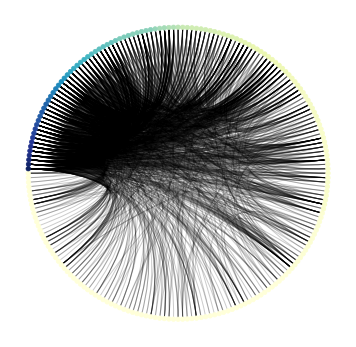

In [55]:
nv.CircosPlot(coffeeG05, edge_width = "Netweight_KG", node_color = "outdegree_centrality",
             node_order = "outdegree_centrality").draw()

In [ ]:
nv.MatrixPlot(coffeeG15, node_order = "outdegree_centrality", node_color = "outdegree_centrality").draw()

In [ ]:
nv.ArcPlot(coffeeG15, node_order = "outdegree_centrality", edge_width = "Netweight_KG").draw()

In [ ]:
nx.draw_networkx(sub_gasG15, font_size = 2, alpha = 0.5, node_color = clr,
                 pos = dict(zip(locs_dict.keys(),zip(lats,lngs))))

In [51]:
pos = nx.spring_layout(coffeeG05,k=4,iterations=2)
size = np.array([x for x in nx.get_node_attributes(coffeeG05,"total_exported").values()])
clr = np.array([x for x in nx.get_node_attributes(coffeeG05,"outdegree_centrality").values()])

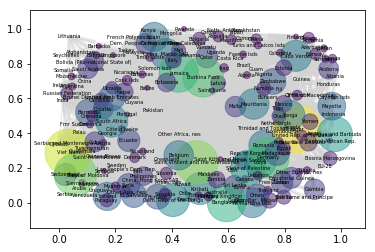

In [65]:
nx.draw_networkx(coffeeG05, font_size = 5, alpha = 0.5, node_color = clr, node_size = clr*5000,
                 pos = pos, edge_color='lightgray')

In [53]:
coffeeG05.edges(data = True)[0]

('Dominica',
 'Barbados',
 {'Commodity': 'Raw Coffee',
  'Netweight_KG': 122,
  'Trade_Value_USD': 1566,
  'Year': 2005,
  'terms': 12.836065573770492})